In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml


In [3]:
#mnist=fetch_openml('mist_784')
mnist=fetch_openml('mnist_784', version=1, as_frame = False)
mnist.keys()            

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
x,y = mnist['data'], mnist['target']

In [5]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
%matplotlib inline 

In [8]:
import matplotlib
import matplotlib.pyplot as plt

In [18]:
some_digit= x[30080]
some_digit_image = some_digit.reshape(28,28) 

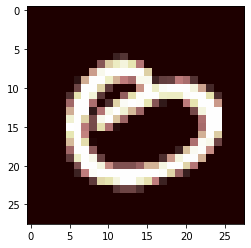

In [19]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.pink, interpolation = 'nearest')

In [11]:
x_train, x_test = x[:60000], x[60000:]

In [12]:
y_train, y_test = y[:60000], y[60000:]

In [13]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [14]:
import numpy as np
shuffle_index = np.random.permutation (60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [36]:
y_train_1 = (y_train == 0)
y_test_1 = (y_test==0)        

In [24]:
y_train_1

array([False, False, False, ..., False, False, False])

In [25]:
y_test_1

array([False, False, False, ..., False, False, False])

In [30]:
#y_train = y_train.astype(np.int8)
#y_test = y_test.astype(np.int8)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
clf = LogisticRegression (tol=0.1)

In [37]:
clf.fit(x_train, y_train_1)
example = clf.predict([some_digit])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
example

array([ True])

In [47]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train,y_train_1, cv=3, scoring ="accuracy")

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [48]:
a.mean()

0.98945